<a href="https://colab.research.google.com/github/hufsaim/T10306201/blob/master/notebook_2025/Lab09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Perceptron

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 가져오기
- 두 가지 class에 대한 label을 포함하는 데이터를 가져오기.
- feature들의 숫자 범위를 비슷하게 맞추어주기 (plas, BMI에 100을 나누어 주었음).

In [2]:
h = pd.read_excel('diabet.xlsx')
h[:4]

,plas,BMI,pedi,class
0,71,33.2,0.42,-1
1,71,28.0,0.59,-1
2,72,31.6,0.28,-1
3,74,29.7,0.29,-1


In [3]:
X = h.iloc[:,:3].to_numpy()
print(X.shape)
X[:,0]=.01*X[:,0]
X[:,1]=.01*X[:,1]
y = h.iloc[:,-1].to_numpy()
print(X[:4],y[:4])

(60, 3)
[[0.71  0.332 0.42 ]
 [0.71  0.28  0.59 ]
 [0.72  0.316 0.28 ]
 [0.74  0.297 0.29 ]] [-1 -1 -1 -1]


### 데이터 시각화

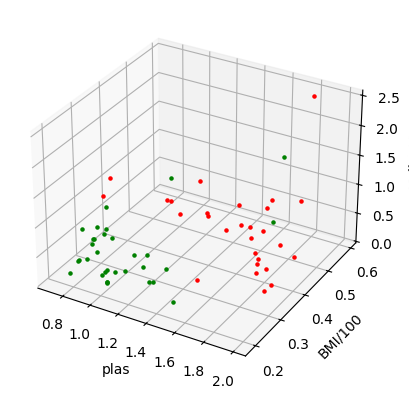

In [4]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for n in range(len(X)):
  if y[n]==1:
    ax.scatter(X[n,0],X[n,1],X[n,2],marker='.',c='r')
  elif y[n]==-1:
    ax.scatter(X[n,0],X[n,1],X[n,2],marker='.',c='g')
ax.set_xlabel('plas')
ax.set_ylabel('BMI/100')
ax.set_zlabel('pedi/100')
plt.show()

### 임의로 정한 파라미터로 분류한 결과를 확인
- 1,1,1,1과 같이 임의로 초기화한 파라미터를 활용하여 분류하고 결과를 확인
- 다른 초기값을 적용해서 정확도를 향상시켜보자.

Accuracy: 0.4666666666666667


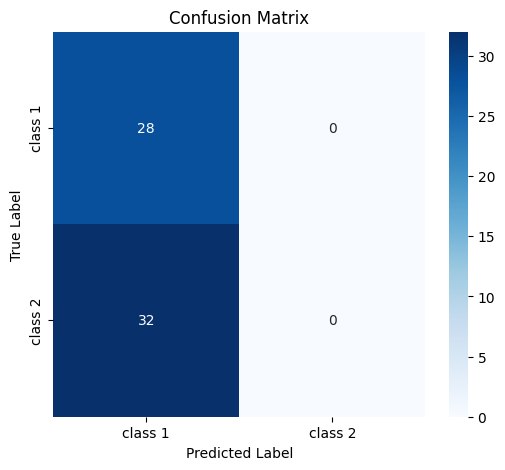

In [5]:
w = np.array([1,1,1,1]) # initial parameters

y_pred = np.zeros_like(y)
for n in range(len(X)):
  y_hat = np.dot(w,np.array([X[n,0],X[n,1],X[n,2],1]))
  if y_hat >= 0:
    y_pred[n] = 1
  else:
    y_pred[n] = -1

C = np.zeros((2,2))
for i in range(len(y)):
  if y[i]==1 and y_pred[i]==1:
    C[0,0]+=1
  elif y[i]==-1 and y_pred[i]==-1:
    C[1,1]+=1
  elif y[i]==1 and y_pred[i]==-1:
    C[0,1]+=1
  elif y[i]==-1 and y_pred[i]==1:
    C[1,0]+=1

acc = (C[0,0]+C[1,1])/len(y)
print('Accuracy:',acc)

plt.figure(figsize=(6, 5))
sns.heatmap(C, annot=True, fmt='g', cmap='Blues',
            xticklabels=['class 1', 'class 2'],
            yticklabels=['class 1', 'class 2'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### 모델 학습
- max_epoch_num, lr, w 를 적절하게 설정하여 perceptron을 학습시키는 과정을 반복하여 accuracy를 최대한 높이자.

In [6]:
max_epoch_num = 5
lr = .005
w = np.array([1,1,1,1])

W = np.zeros((4,max_epoch_num+1))
dw = 1e6
TH = 1e-6
X_tr = np.zeros((X.shape[0],X.shape[1]+1))
X_tr[:,:3] = X
X_tr[:,3] = 1

In [7]:
n = 0
W[:,0] = w
while dw>TH:
  n = n+1
  w_k = w.copy()
  for i in range(len(X_tr)):
    y_hat = np.dot(w,X_tr[i])
    if y_hat <= 0 and y[i]==1:
      w  = w + lr*X_tr[i]
    elif y_hat >= 0 and y[i]==-1:
      w  = w - lr*X_tr[i]
    else:
      w = w

  y_pred = np.zeros_like(y)
  for i in range(len(X)):
    y_hat = np.dot(w,X_tr[i])
    if y_hat >= 0:
      y_pred[i] = 1
    else:
      y_pred[i] = -1

  C = np.zeros((2,2))
  for i in range(len(y)):
    if y[i]==1 and y_pred[i]==1:
      C[0,0]+=1
    elif y[i]==-1 and y_pred[i]==-1:
      C[1,1]+=1
    elif y[i]==1 and y_pred[i]==-1:
      C[0,1]+=1
    elif y[i]==-1 and y_pred[i]==1:
      C[1,0]+=1

  W[:,n] = w
  acc = (C[0,0]+C[1,1])/len(y)
  print('epoch #:',n,'Accuracy:',acc)

  dw = np.linalg.norm(w-w_k)
  if dw <= TH:
    break
  if n >= max_epoch_num:
    break

epoch #: 1 Accuracy: 0.4666666666666667
epoch #: 2 Accuracy: 0.4666666666666667
epoch #: 3 Accuracy: 0.4666666666666667
epoch #: 4 Accuracy: 0.4666666666666667
epoch #: 5 Accuracy: 0.4666666666666667


### 학습결과 확인
- 학습과정에서 각 파라미터가 어떻게 변하였는지 확인해보자.


parameters (last epoch): [0.1975  0.77235 0.69025 0.2    ]


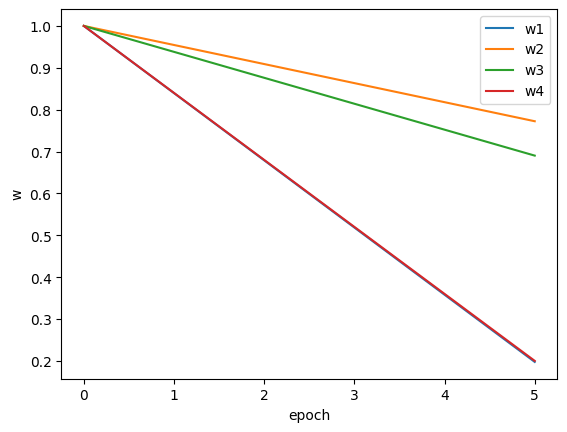

In [8]:
print(f'parameters (last epoch): {w}')
plt.plot(W[0])
plt.plot(W[1])
plt.plot(W[2])
plt.plot(W[3])
plt.legend(['w1','w2','w3','w4'])
plt.xlabel('epoch')
plt.ylabel('w')
plt.show()

### 학습결과 확인
- 학습이 종료된 모델에 대한 각 데이터의 분류결과를 확인해보자.


Accuracy: 0.4666666666666667


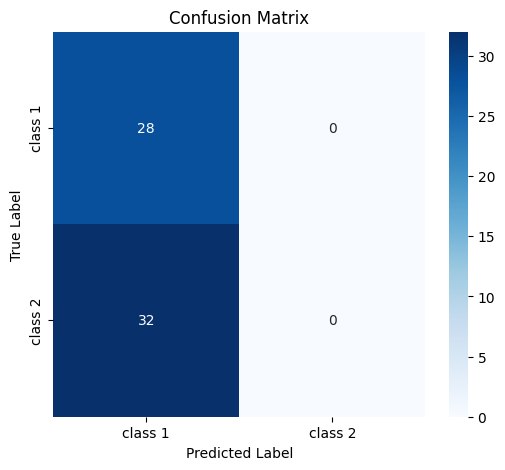

In [9]:
y_pred = np.zeros_like(y)
for n in range(len(X)):
  y_hat = np.dot(w,np.array([X[n,0],X[n,1],X[n,2],1]))
  if y_hat >= 0:
    y_pred[n] = 1
  else:
    y_pred[n] = -1

C = np.zeros((2,2))
for i in range(len(y)):
  if y[i]==1 and y_pred[i]==1:
    C[0,0]+=1
  elif y[i]==-1 and y_pred[i]==-1:
    C[1,1]+=1
  elif y[i]==1 and y_pred[i]==-1:
    C[0,1]+=1
  elif y[i]==-1 and y_pred[i]==1:
    C[1,0]+=1

acc = (C[0,0]+C[1,1])/len(y)
print('Accuracy:',acc)

plt.figure(figsize=(6, 5))
sns.heatmap(C, annot=True, fmt='g', cmap='Blues',
            xticklabels=['class 1', 'class 2'],
            yticklabels=['class 1', 'class 2'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()